In [3]:
import pandas as pd

In [4]:
# Importing Data Frame 
df= pd.read_csv('https://raw.githubusercontent.com/HadenMoore/Dash-App/master/Data/data.csv') 
# Renaming Transmission Type Column to Transmission 
df.rename(columns={'Transmission Type': 'Transmission'}, inplace= True)
# Converting Manual to 1's and Automatic to 0's 
df['Transmission'] = df['Transmission'].map({'MANUAL': 1, 'AUTOMATIC': 0})
# Renaming Engine HP Column to Horsepower 
df.rename(columns={'Engine HP': 'Horsepower'}, inplace= True)
# Renaming Column 'Number of Doors' to 'Doors'
df.rename(columns= {'Number of Doors': 'Doors'}, inplace= True)
# Renaming Column 'highway MPG' to 'Hwy_Mpg'
df.rename(columns= {'highway MPG': 'hwy_Mpg'}, inplace= True)
# Dropping NaNs
new_df = df.dropna()
new_df.shape

(7456, 16)

In [5]:
new_df.head()

,Make,Model,Year,Engine Fuel Type,Horsepower,Engine Cylinders,Transmission,Driven_Wheels,Doors,Market Category,Vehicle Size,Vehicle Style,hwy_Mpg,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,1.0,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,1.0,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,1.0,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,1.0,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,1.0,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [40]:
new_df.Year.max()

2017

In [42]:
X_train.describe()

,Year,Horsepower,Doors,Transmission
count,7456.000000,7456.000000,7456.000000,7456.000000
mean,2011.867623,270.858771,3.447425,0.227334
std,6.483745,108.159852,0.881845,0.419138
min,1990.000000,55.000000,2.000000,0.000000
25%,2010.000000,189.000000,2.000000,0.000000
50%,2015.000000,265.000000,4.000000,0.000000
75%,2016.000000,318.000000,4.000000,0.000000
max,2017.000000,707.000000,4.000000,1.000000


In [7]:
# Dividing the Dataframe for train/test/split 
# So I will be using 2485 rows to train and 2694 to test.  
7456 / 3

2485.3333333333335

In [8]:
# Assigning to X, y
# Testing on last 2,485,
# Validating on the 2,485,
# Train on the last 2,485,
test = new_df 
val = new_df
train = new_df    
target = 'MSRP'
features = ['Year', 
            'Horsepower',
            'Doors', 
            'Transmission',
            ]

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

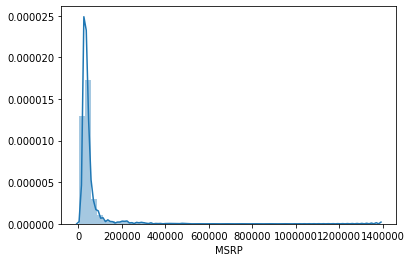

In [9]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

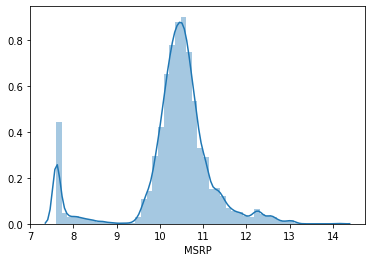

In [10]:
# The Target has a Heavy right skew. 
# Performing Log Transform to noramlly distribute the Target

import numpy as np
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

# Plotting the transformed target's distribution
sns.distplot(y_train_log);

In [11]:
features = ['Year', 'Horsepower', 'Doors', 'Transmission']
train.describe()


,Year,Horsepower,Engine Cylinders,Transmission,Doors,hwy_Mpg,city mpg,Popularity,MSRP
count,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7.456000e+03
mean,2011.867623,270.858771,5.788358,0.227334,3.447425,26.312366,19.278031,1485.860649,4.596413e+04
std,6.483745,108.159852,1.804459,0.419138,0.881845,5.883413,5.784025,1430.444781,5.412418e+04
min,1990.000000,55.000000,3.000000,0.000000,2.000000,12.000000,8.000000,2.000000,2.000000e+03
25%,2010.000000,189.000000,4.000000,0.000000,2.000000,22.000000,16.000000,520.000000,2.533000e+04
50%,2015.000000,265.000000,6.000000,0.000000,4.000000,26.000000,18.000000,1013.000000,3.480000e+04
75%,2016.000000,318.000000,6.000000,0.000000,4.000000,30.000000,21.000000,2009.000000,4.770000e+04
max,2017.000000,707.000000,12.000000,1.000000,4.000000,53.000000,58.000000,5657.000000,1.382750e+06


In [12]:
# Assign to X, y
features = ['Year', 'Horsepower', 'Doors', 'Transmission']
target = 'MSRP'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [33]:
# Fitting a Tuned Random Forest Model 
import shap
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    6.8s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    8.7s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.0s finished


In [34]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'max_depth': 15, 'max_features': 0.36617954232869165, 'n_estimators': 421}
Cross-validation MAE 14387.679557491883


In [35]:
def predict(Year, Horsepower, Doors, Transmission):
  new_df = pd.DataFrame(
      data=[[Year, Horsepower, Doors, Transmission]],
      columns=['Year', 'Horsepower', 'Doors', 'Transmission']
  )
  pred = model.predict(new_df)[0]

  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(new_df)

  feature_names = new_df.columns
  feature_values = new_df.values[0]
  shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

  result = f'MSRP is Estimated at ${pred:,.0f} for this Vehicle. \n\n'
  result += f'Starting from a baseline of ${explainer.expected_value:,.0f}. \n'
  result += shaps.to_string()
  return result
result = predict(Year=2011, Horsepower=335, Doors=2, Transmission=1)
print (result)

MSRP is Estimated at $46,773 for this Vehicle. 

Starting from a baseline of $46,004. 
(Year, 2011)         9100.240996
(Horsepower, 335)   -9174.565054
(Doors, 2)           4665.202303
(Transmission, 1)   -3822.257214


In [36]:
predict(Year=2011, Horsepower=335, Doors=2, Transmission=0)

'MSRP is Estimated at $42,897 for this Vehicle. \n\nStarting from a baseline of $46,004. \n(Year, 2011)          5646.748430\n(Horsepower, 335)   -10062.805131\n(Doors, 2)             403.889953\n(Transmission, 0)      904.844290'

In [37]:
predict(Year=2015, Horsepower=335, Doors=2, Transmission=1)

'MSRP is Estimated at $44,821 for this Vehicle. \n\nStarting from a baseline of $46,004. \n(Year, 2015)         1737.028836\n(Horsepower, 335)    1412.932939\n(Doors, 2)           1769.453476\n(Transmission, 1)   -6102.092773'

In [18]:
predict(Year=2015, Horsepower=300, Doors=4, Transmission=0)

'MSRP is Estimated at $45,941 for this Vehicle. \n\nStarting from a baseline of $45,997. \n(Year, 2015)         2365.470496\n(Horsepower, 300)   -3042.183804\n(Doors, 4)          -1587.180067\n(Transmission, 0)    2208.756023'

In [17]:
# Logistic Regression
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.OrdinalEncoder(), # Not ideal for Linear Regression 
    StandardScaler(), 
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 0.4339749709393271


In [18]:
example = X_val.iloc[[20]]
example

,Year,Horsepower,Doors,Transmission
20,1992,172.0,4.0,1.0


In [21]:
# Gradient Boosting 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train_log)
y_pred_log = gb.predict(X_val)
y_pred = np.expm1(y_pred_log)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

/Users/Haden/.local/share/virtualenvs/Dash-App-poh2mlps/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Gradient Boosting R^2 0.8173973794410121


In [22]:
example = X_val.iloc[[18]]
example

,Year,Horsepower,Doors,Transmission
18,1992,172.0,4.0,1.0


In [25]:
pip install plotly.express

  Using cached https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [38]:
type(model)

sklearn.ensemble.forest.RandomForestRegressor

In [39]:
from joblib import dump
dump(model, 'model.joblib')

['model.joblib']

In [21]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=0.2873359408003402, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=459,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)